<a href="https://colab.research.google.com/github/jlohunecke/ml/blob/master/power_price_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [186]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, date

In [187]:
filter=4169
region='DE'
resolution='quarterhour'
timestamps=0
no_weeks = 2

In [188]:
# Verfügbare Timestamps laden
try:
    # Anfrage an die API senden
    response = requests.get(f"https://www.smard.de/app/chart_data/{filter}/{region}/index_{resolution}.json")

    # Antwort überprüfen
    if response.status_code == 200:
        data = response.json()
        timestamps = data['timestamps'][-(no_weeks+1):-1]
    else:
        print(f"Fehler bei der API-Anfrage. Statuscode: {response.status_code}")

except requests.exceptions.RequestException as e:
    print(f"Fehler bei der Verbindung zur API: {e}")

In [189]:
# Verfügbare Preisdaten laden
df = pd.DataFrame()

for i in range(no_weeks):
  try:
      # Anfrage an die API senden
      url = f"https://smard.api.proxy.bund.dev/app/chart_data/{filter}/{region}/{filter}_{region}_{resolution}_{timestamps[i]}.json"
      response = requests.get(url)

      # Antwort überprüfen
      if response.status_code == 200:
          data = response.json()
          df = pd.concat([df,pd.DataFrame(data['series'], columns=['Timestamp', 'Price'])], axis=0)
      else:
          print(f"Fehler bei der API-Anfrage. Statuscode: {response.status_code}")

  except requests.exceptions.RequestException as e:
      print(f"Fehler bei der Verbindung zur API: {e}")

df = df.reset_index(drop=True)

In [190]:
# Datensatz filtern und erweitern
df = df.dropna(axis=0)
df['Date'] = pd.to_datetime(df['Timestamp'], unit='ms').dt.date
df['Time'] = pd.to_datetime(df['Timestamp'], unit='ms').dt.time
date_counts = df['Date'].value_counts()
max_count = date_counts.max()
df = df[df['Date'].map(date_counts) == max_count]

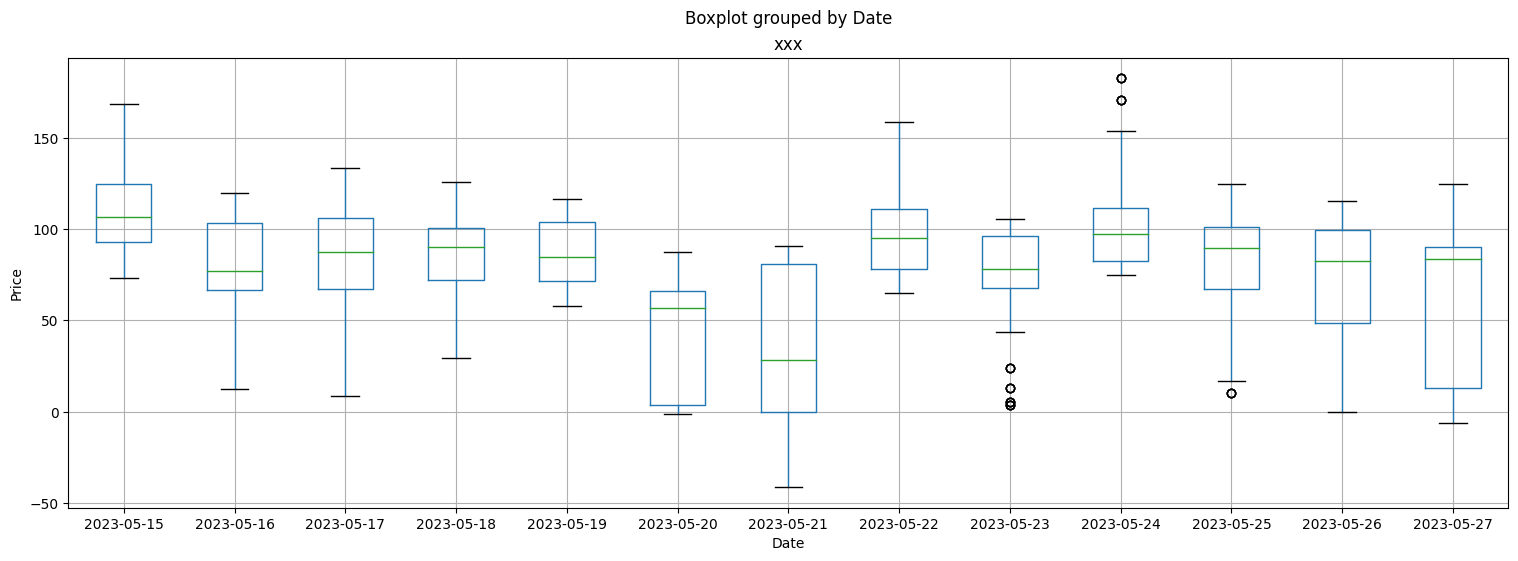

In [191]:
# Create box plot
plt.rcParams["figure.figsize"] = (18, 6)
df.boxplot(column='Price', by='Date')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('xxx')
plt.show()